# Bloch equation

PRL **76**, 535 (1996).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

from pulselaser import gaussian_pulse
from pulselaser.bloch import bloch, rho22

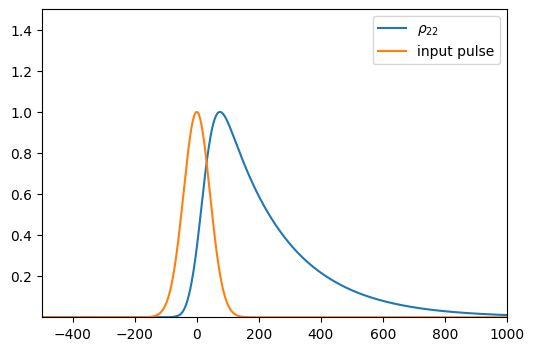

In [29]:
t_span = (-2000, 2000) # should take sufficiently long 
init = [0+0j, 0+0j]
fwhm = 100
t1 = 200
sol = solve_ivp (bloch, t_span=t_span, y0=init,
                 args=(fwhm, t1, 0, 1e-3), 
                 t_eval=np.linspace(*t_span, 2000)) 
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(sol.t, sol.y[0]/ np.max(sol.y[0]), label=r"$\rho_{22}$")
ax.plot(sol.t, gaussian_pulse(sol.t, fwhm=fwhm ), label="input pulse")
ax.set_xlim((-500, 1000))
#ax.set_yscale('log')
ax.set_ylim([1E-6, 1.5])

ax.legend()


fig, ax2 = plt.subplots(figsize=(7, 5))
rho22(t)

ax2.plot(sol.t, sol.y[0]/ np.max(sol.y[0]), label=r"$\rho_{22}$")
ax2.plot(sol.t, gaussian_pulse(sol.t, fwhm=fwhm ), label="input pulse")
ax2.set_xlim((-500, 1000))
ax2.legend()